In [1]:
import pandas as pd

raw_data = pd.read_csv("currency_exchange_rates.csv")

In [2]:
raw_data.head()

,Date,Algerian Dinar,Australian Dollar,Bahrain Dinar,Bolivar Fuerte,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,U.K. Pound Sterling,U.S. Dollar
0,1995-1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1995-1-3,NaN,NaN,0.376,NaN,NaN,0.843,NaN,1.4035,NaN,...,3.55,50.04,7.4588,1.3168,25.10,5.8750,NaN,3.671,1.5617,1.0
2,1995-1-4,NaN,0.7704,0.376,NaN,NaN,0.844,NaN,1.4026,NaN,...,3.56,50.07,7.4480,1.3161,25.13,5.8738,NaN,3.671,1.5605,1.0
3,1995-1-5,NaN,0.7693,0.376,NaN,NaN,0.844,NaN,1.4002,NaN,...,3.55,50.07,7.4450,1.3080,25.14,5.8700,NaN,3.671,1.5610,1.0
4,1995-1-6,NaN,0.7699,0.376,NaN,NaN,0.842,NaN,1.4002,NaN,...,3.56,50.07,NaN,1.3040,25.13,5.8810,NaN,3.671,1.5645,1.0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5978 entries, 0 to 5977
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        5978 non-null   object 
 1   Algerian Dinar              1866 non-null   float64
 2   Australian Dollar           5715 non-null   float64
 3   Bahrain Dinar               5909 non-null   float64
 4   Bolivar Fuerte              2314 non-null   float64
 5   Botswana Pula               4703 non-null   float64
 6   Brazilian Real              5439 non-null   float64
 7   Brunei Dollar               4732 non-null   float64
 8   Canadian Dollar             5622 non-null   float64
 9   Chilean Peso                4758 non-null   float64
 10  Chinese Yuan                4662 non-null   float64
 11  Colombian Peso              5396 non-null   float64
 12  Czech Koruna                4128 non-null   float64
 13  Danish Krone                5727 

In [4]:
cols = raw_data.columns
valid_cols = []
min_size = raw_data.shape[0]
for col in cols:
    if raw_data.shape[0] - raw_data[col].isna().sum() > 5000:
        min_size = min(min_size, raw_data.shape[0] - raw_data[col].isna().sum())
        valid_cols.append(col)

In [5]:
print(valid_cols)

['Date', 'Australian Dollar', 'Bahrain Dinar', 'Brazilian Real', 'Canadian Dollar', 'Colombian Peso', 'Danish Krone', 'Icelandic Krona', 'Indian Rupee', 'Japanese Yen', 'Korean Won', 'Libyan Dinar', 'Malaysian Ringgit', 'Nepalese Rupee', 'New Zealand Dollar', 'Norwegian Krone', 'Pakistani Rupee', 'Qatar Riyal', 'Rial Omani', 'Saudi Arabian Riyal', 'Singapore Dollar', 'South African Rand', 'Sri Lanka Rupee', 'Swedish Krona', 'Swiss Franc', 'Thai Baht', 'Trinidad And Tobago Dollar', 'U.A.E. Dirham', 'U.K. Pound Sterling', 'U.S. Dollar']


In [6]:
print(min_size)

5321


In [7]:
cleaned_data = raw_data[valid_cols].tail(min_size)

In [8]:
cleaned_data.isna().sum()

Date                            0
Australian Dollar             236
Bahrain Dinar                  67
Brazilian Real                503
Canadian Dollar               335
Colombian Peso                557
Danish Krone                  226
Icelandic Krona               314
Indian Rupee                  401
Japanese Yen                  285
Korean Won                    555
Libyan Dinar                  120
Malaysian Ringgit             252
Nepalese Rupee                476
New Zealand Dollar            277
Norwegian Krone               267
Pakistani Rupee               483
Qatar Riyal                    45
Rial Omani                     54
Saudi Arabian Riyal            44
Singapore Dollar              232
South African Rand            498
Sri Lanka Rupee               458
Swedish Krona                 307
Swiss Franc                   218
Thai Baht                     522
Trinidad And Tobago Dollar    619
U.A.E. Dirham                  69
U.K. Pound Sterling           104
U.S. Dollar   

In [9]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

In [10]:
cleaned_data

,Date,Australian Dollar,Bahrain Dinar,Brazilian Real,Canadian Dollar,Colombian Peso,Danish Krone,Icelandic Krona,Indian Rupee,Japanese Yen,...,Singapore Dollar,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,U.A.E. Dirham,U.K. Pound Sterling,U.S. Dollar
657,1997-07-15,0.7356,0.376,1.0798,1.3704,1099.56,6.8385,71.15,35.7200,114.10,...,1.4413,4.56000,59.1450,7.7930,1.4737,29.967,6.2631,3.6710,1.68540,1.0
658,1997-07-16,0.7336,0.376,1.0800,1.3735,1099.25,6.8300,71.19,35.7100,115.60,...,1.4437,4.55000,59.1850,7.8330,1.4773,30.062,6.2793,3.6710,1.67780,1.0
659,1997-07-17,0.7376,0.376,1.0803,1.3781,1100.83,6.8465,71.23,35.7100,116.15,...,1.4525,4.56000,59.2175,7.8245,1.4824,30.127,6.2609,3.6710,1.66700,1.0
660,1997-07-18,0.7386,0.376,1.0804,1.3743,1102.48,6.8300,71.16,35.7100,116.15,...,1.4612,4.56000,NaN,7.7890,1.4830,30.127,6.2659,3.6710,1.67090,1.0
661,1997-07-21,0.7409,0.376,1.0808,1.3745,1105.33,6.8310,71.01,35.7000,NaN,...,1.4648,4.58000,59.2100,7.7720,1.4778,NaN,6.2647,3.6710,1.67600,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,2018-04-26,0.7574,0.376,3.4971,1.2862,2820.29,6.1234,101.00,66.8299,109.37,...,1.3274,12.40640,157.4628,8.5481,0.9835,31.595,6.7842,3.6725,1.39655,1.0
5974,2018-04-27,0.7545,0.376,3.4670,NaN,2812.83,NaN,101.40,66.7801,109.31,...,1.3269,NaN,157.6459,8.6911,0.9907,31.617,6.7572,3.6725,1.37685,1.0
5975,2018-04-30,0.7570,0.376,3.4805,1.2836,2806.28,6.1678,101.03,66.7801,109.31,...,1.3238,12.43145,157.6459,8.6774,0.9894,31.510,6.7393,3.6725,1.37250,1.0
5976,2018-05-01,0.7540,0.376,NaN,NaN,2809.92,NaN,NaN,NaN,109.30,...,NaN,NaN,157.4737,NaN,NaN,NaN,6.7385,3.6725,1.36945,1.0


In [11]:
cleaned_data = cleaned_data.fillna(method='ffill')

C:\Users\dhanushgw\AppData\Local\Temp\ipykernel_19428\2754035159.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = cleaned_data.fillna(method='ffill')


In [12]:
cleaned_data.isna().sum()

Date                          0
Australian Dollar             0
Bahrain Dinar                 0
Brazilian Real                0
Canadian Dollar               0
Colombian Peso                0
Danish Krone                  0
Icelandic Krona               0
Indian Rupee                  0
Japanese Yen                  0
Korean Won                    0
Libyan Dinar                  0
Malaysian Ringgit             0
Nepalese Rupee                0
New Zealand Dollar            0
Norwegian Krone               0
Pakistani Rupee               0
Qatar Riyal                   0
Rial Omani                    0
Saudi Arabian Riyal           0
Singapore Dollar              0
South African Rand            0
Sri Lanka Rupee               0
Swedish Krona                 0
Swiss Franc                   0
Thai Baht                     0
Trinidad And Tobago Dollar    0
U.A.E. Dirham                 0
U.K. Pound Sterling           0
U.S. Dollar                   0
dtype: int64

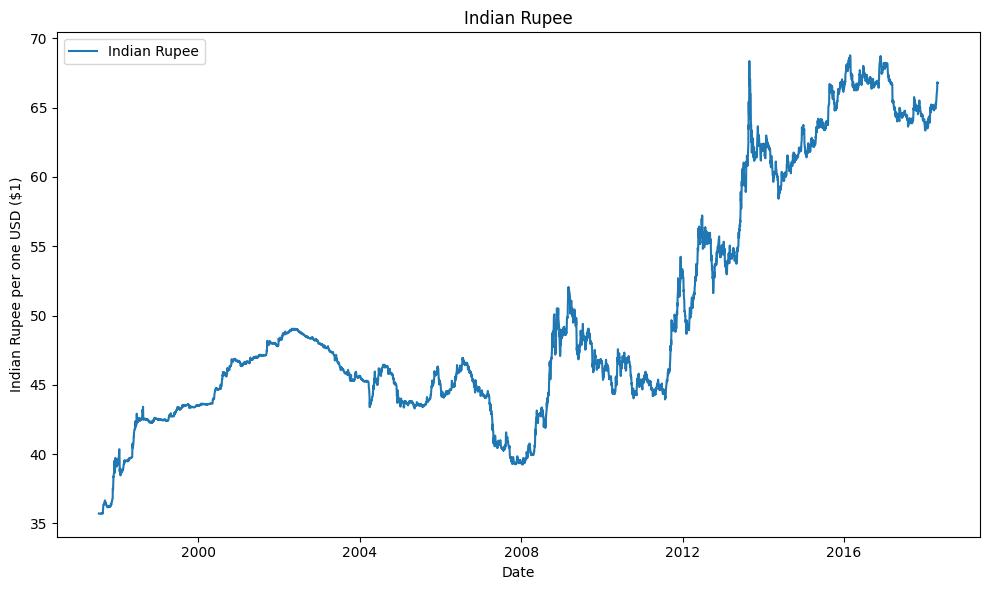

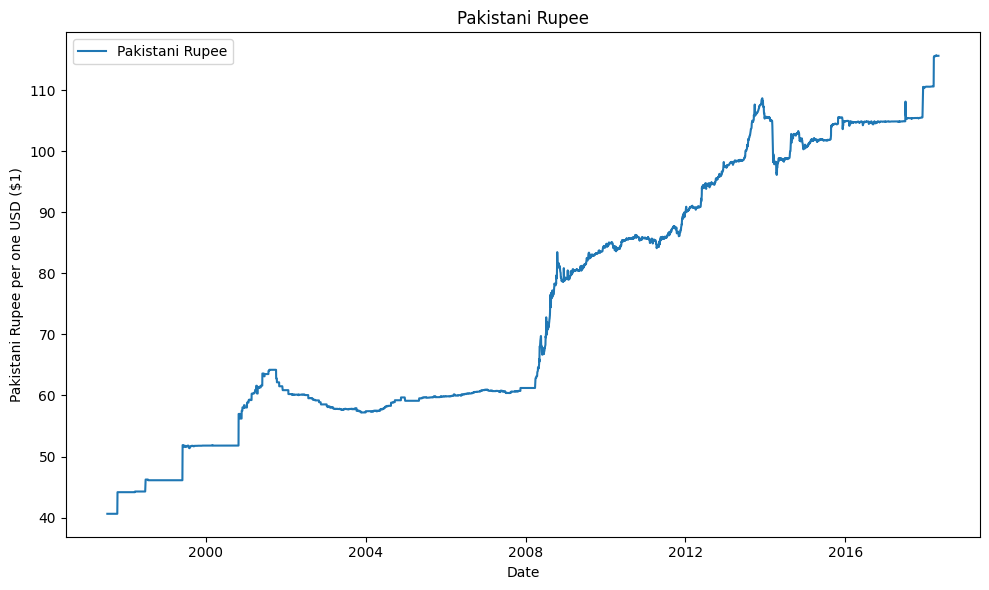

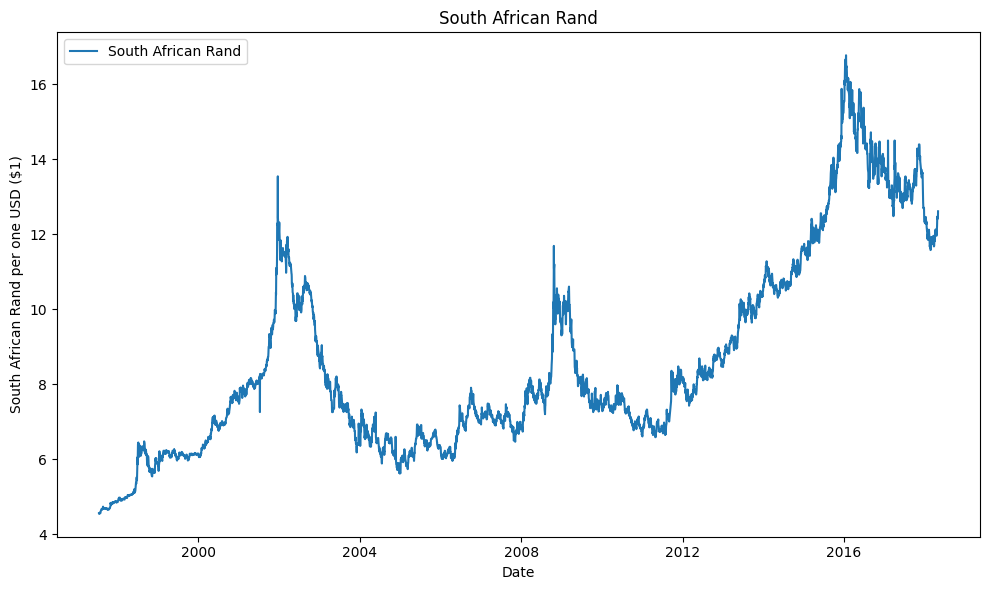

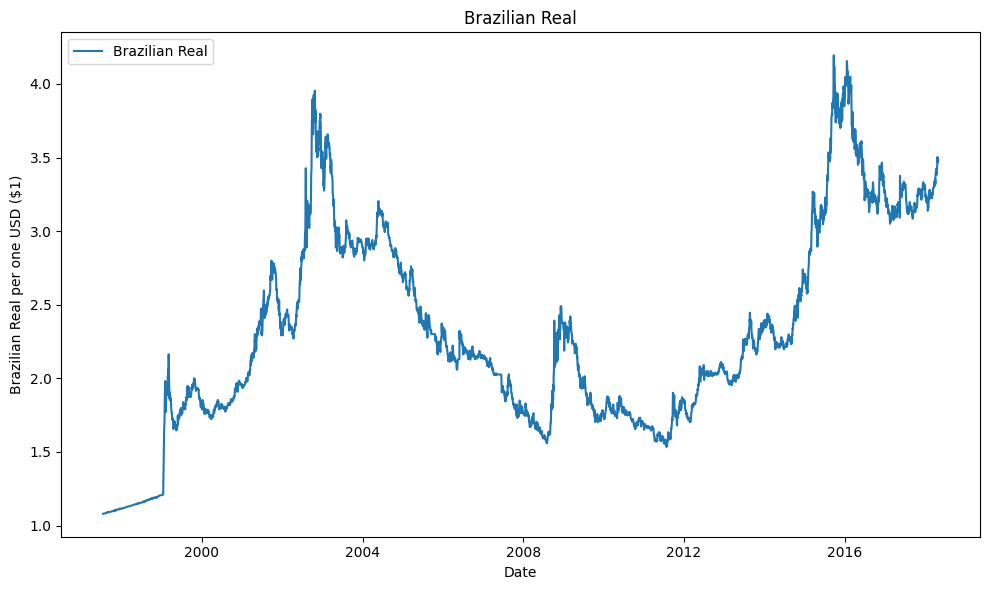

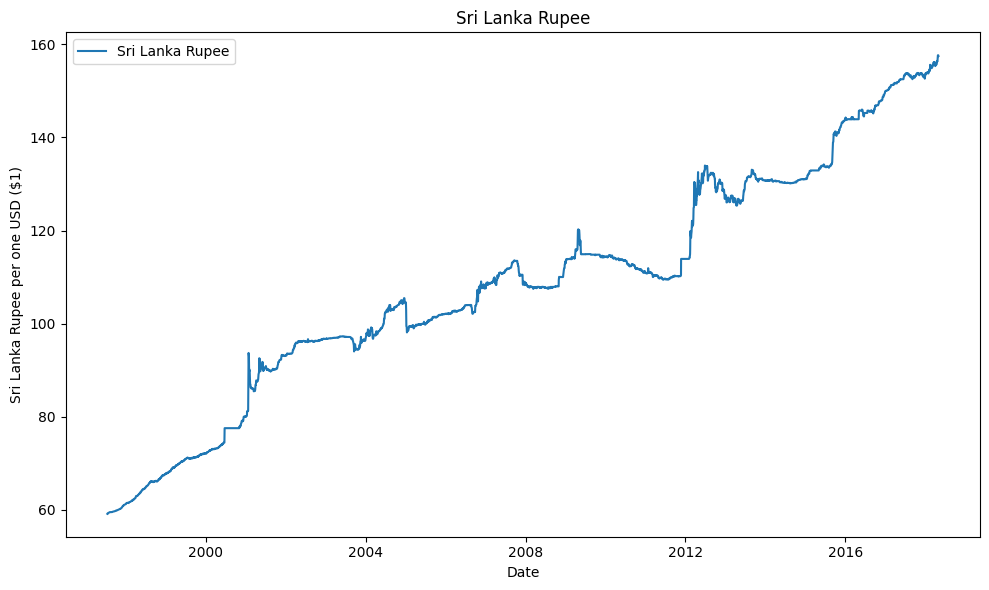

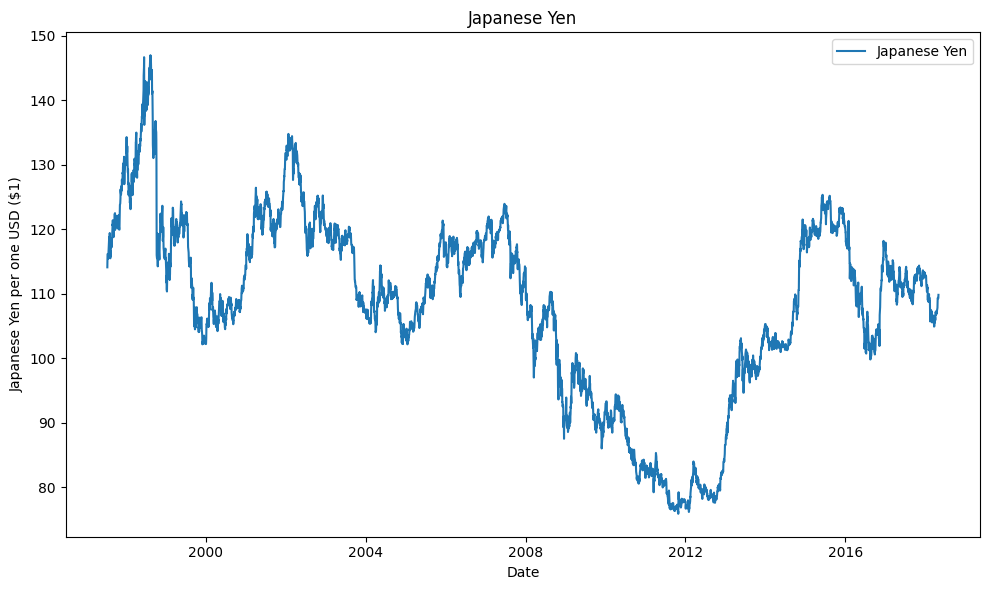

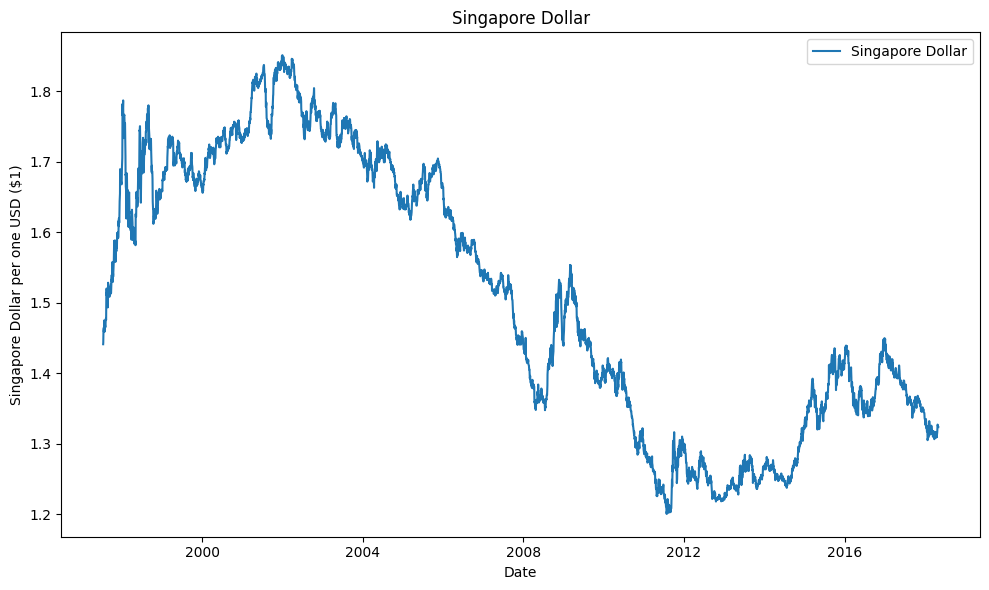

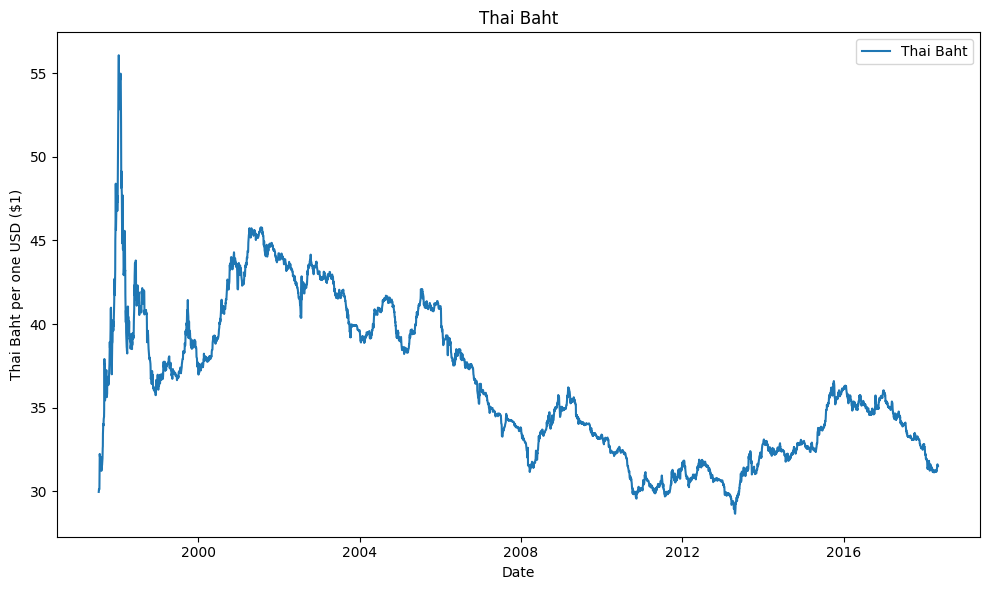

In [16]:
import matplotlib.pyplot as plt

for col in ["Indian Rupee", "Pakistani Rupee", "South African Rand", "Brazilian Real", "Sri Lanka Rupee", "Japanese Yen", "Singapore Dollar", "Thai Baht"]:
    plt.figure(figsize=(10, 6))
    plt.plot(cleaned_data['Date'],cleaned_data[col], label=col)
    plt.title(col)
    plt.xlabel("Date")
    plt.ylabel(f"{col} per one USD ($1)")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [14]:
from utilities import *

Result of ADF-test on Indian Rupee
ADF Statistic: -0.6312723487763835
p-value: 0.8637580479060039
Critical Values: 
	1%: -3.43
	5%: -2.86
	10%: -2.57


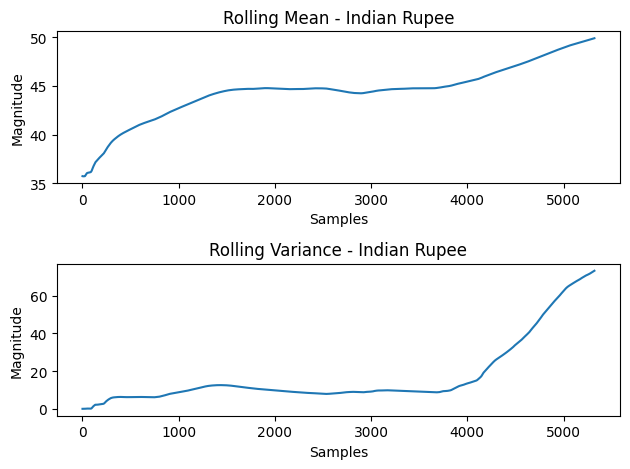

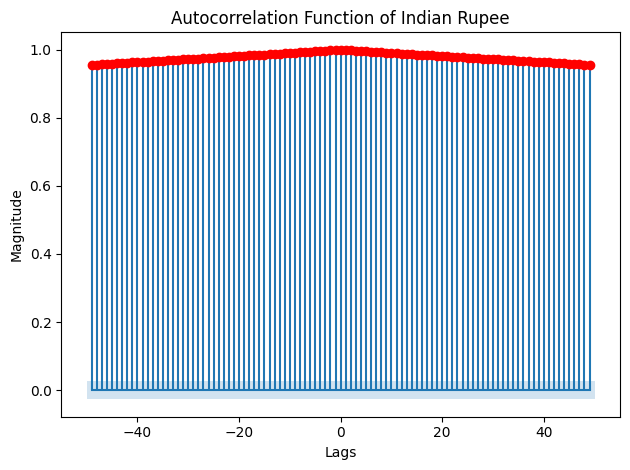

Result of ADF-test on Pakistani Rupee
ADF Statistic: 0.2568683292952488
p-value: 0.9752767527854139
Critical Values: 
	1%: -3.43
	5%: -2.86
	10%: -2.57


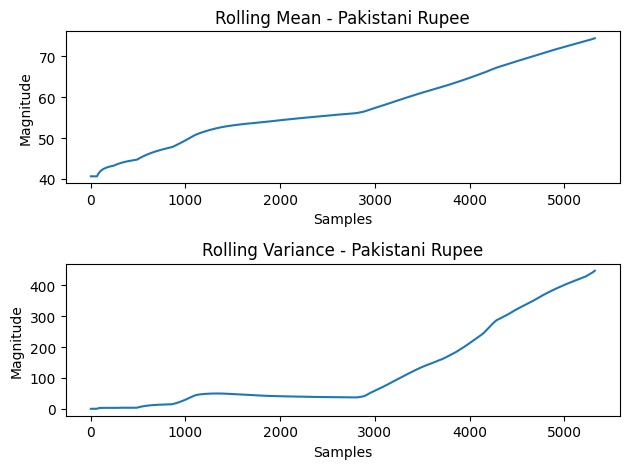

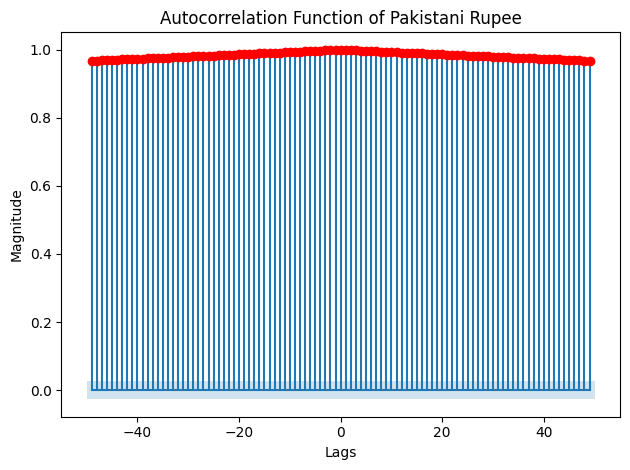

Result of ADF-test on South African Rand
ADF Statistic: -1.3151790519415258
p-value: 0.622199585055012
Critical Values: 
	1%: -3.43
	5%: -2.86
	10%: -2.57


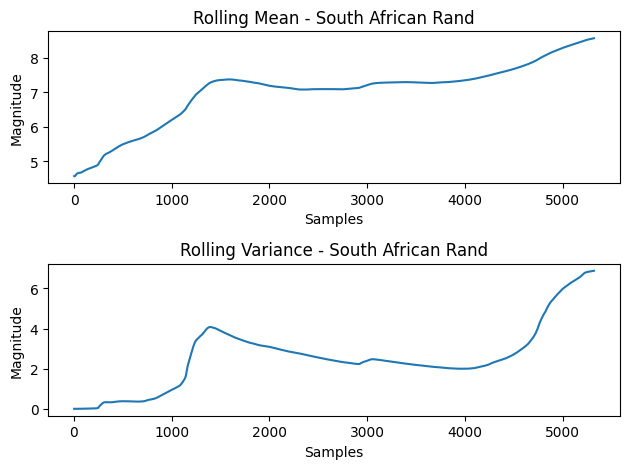

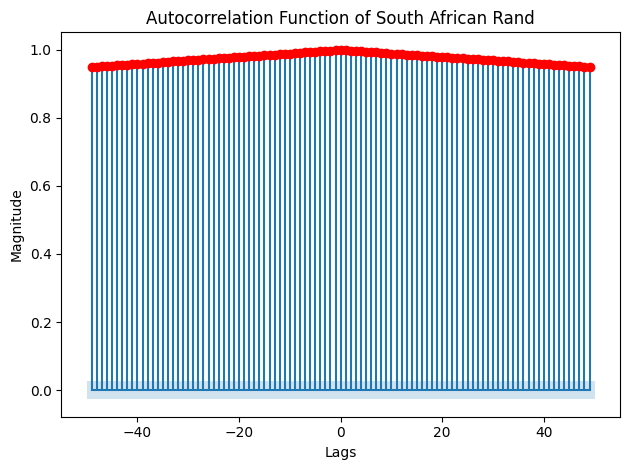

Result of ADF-test on Brazilian Real
ADF Statistic: -1.5654639460105217
p-value: 0.5009150713894974
Critical Values: 
	1%: -3.43
	5%: -2.86
	10%: -2.57


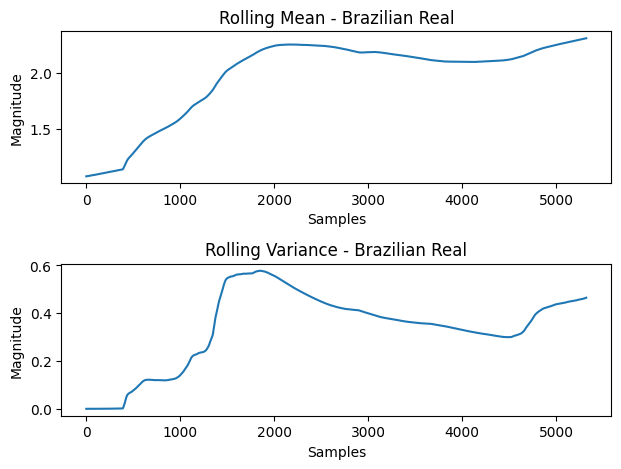

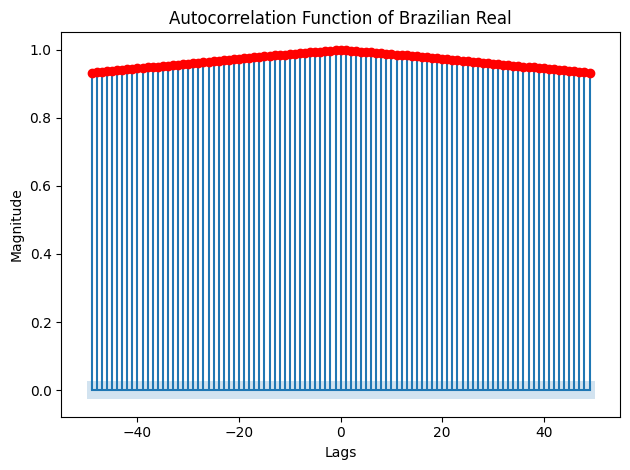

Result of ADF-test on Sri Lanka Rupee
ADF Statistic: -0.48709919063547324
p-value: 0.8945095113993167
Critical Values: 
	1%: -3.43
	5%: -2.86
	10%: -2.57


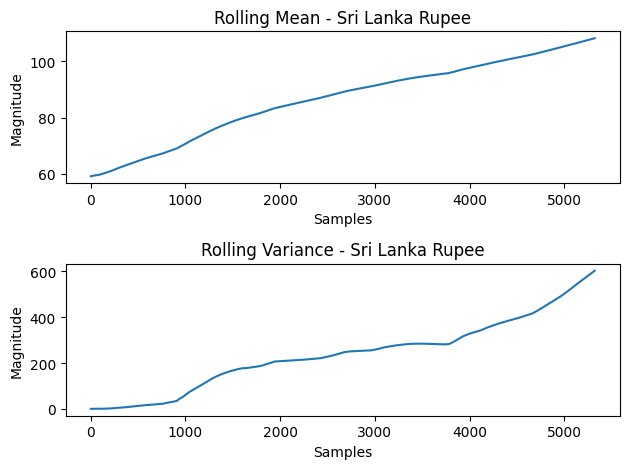

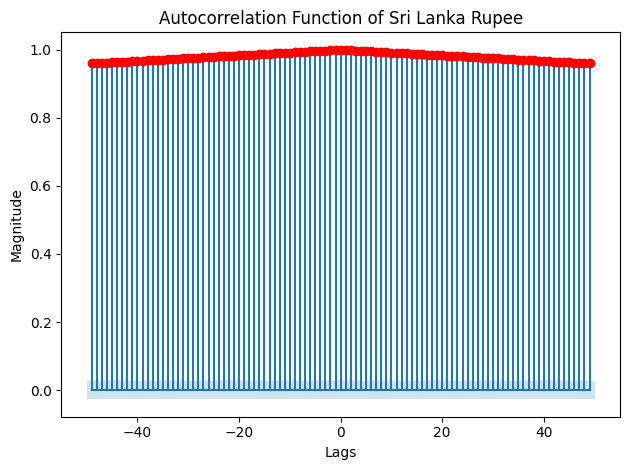

Result of ADF-test on Japanese Yen
ADF Statistic: -1.9193243236369115
p-value: 0.3230256553990264
Critical Values: 
	1%: -3.43
	5%: -2.86
	10%: -2.57


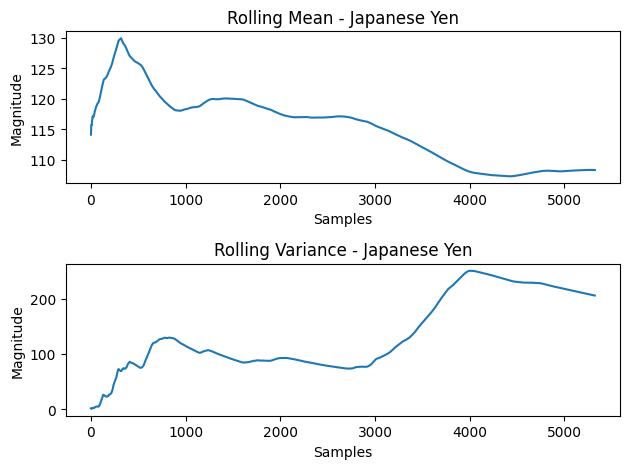

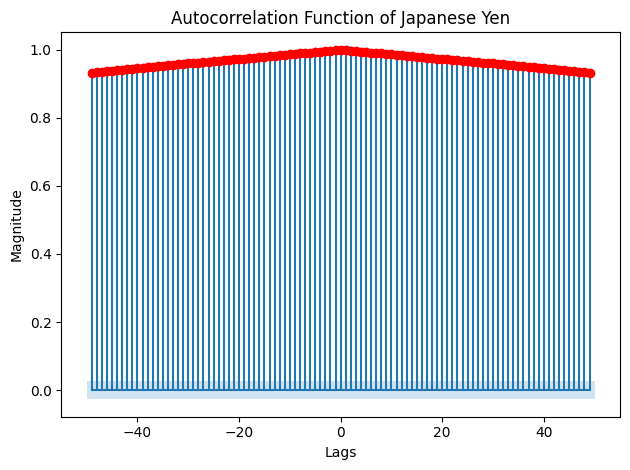

Result of ADF-test on Singapore Dollar
ADF Statistic: -0.8878705807426887
p-value: 0.7919405616804032
Critical Values: 
	1%: -3.43
	5%: -2.86
	10%: -2.57


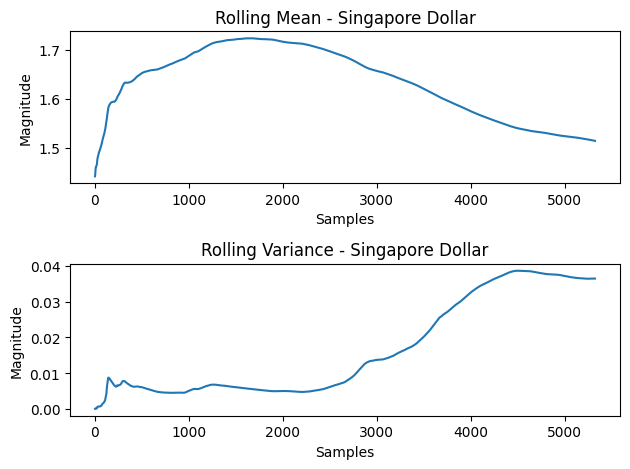

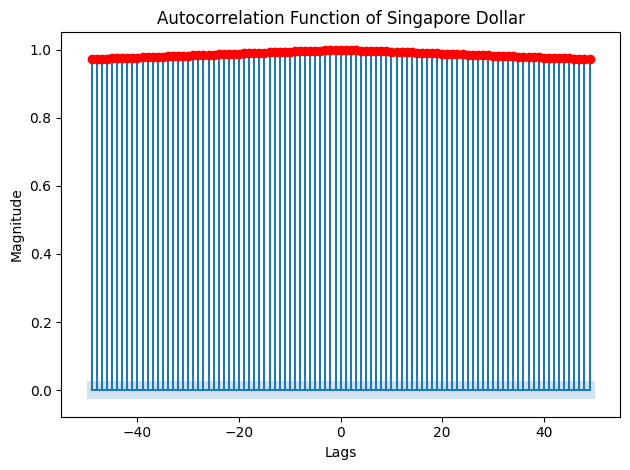

Result of ADF-test on Thai Baht
ADF Statistic: -2.4788440966001515
p-value: 0.12070700164286319
Critical Values: 
	1%: -3.43
	5%: -2.86
	10%: -2.57


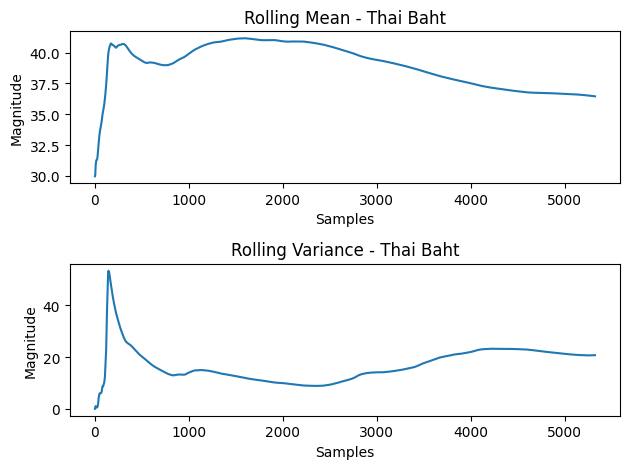

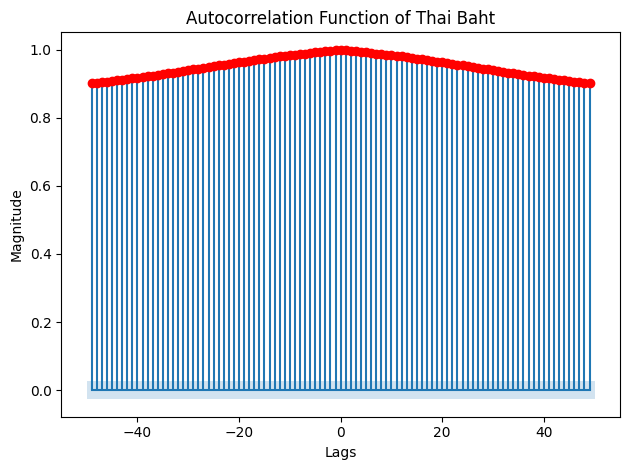

In [17]:
for col in ["Indian Rupee", "Pakistani Rupee", "South African Rand", "Brazilian Real", "Sri Lanka Rupee", "Japanese Yen", "Singapore Dollar", "Thai Baht"]:
    print(f"Result of ADF-test on {col}")
    calculate_adf(cleaned_data[col].to_numpy())
    
    rolling_mean_var = calculate_rolling_mean_var(cleaned_data[col])    
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(rolling_mean_var['Samples'], rolling_mean_var['Rolling_Mean'])
    ax[0].set_title(f'Rolling Mean - {col}')
    ax[0].set_ylabel('Magnitude')
    ax[0].set_xlabel('Samples')
    ax[1].plot(rolling_mean_var['Samples'], rolling_mean_var['Rolling_Var'])
    ax[1].set_title(f'Rolling Variance - {col}')
    ax[1].set_ylabel('Magnitude')
    ax[1].set_xlabel('Samples')
    plt.tight_layout()
    plt.show()
    
    acf = calculate_acf(cleaned_data[col].to_numpy(), 50)
    acf_sym = np.concatenate([acf[-1:0:-1], acf])
    conf_int = 1.96 / np.sqrt(cleaned_data.shape[0])
    
    locs = [i for i in range(-acf.shape[0] + 1, acf.shape[0])]
    plt.figure()
    plt.stem(locs, acf_sym, linefmt='-', markerfmt='ro', basefmt='-')
    plt.fill_between(range(-acf.shape[0], acf.shape[0]+1), -conf_int, conf_int, alpha=0.2)
    
    plt.xlabel("Lags")
    plt.ylabel("Magnitude")
    plt.title(f"Autocorrelation Function of {col}")
    plt.tight_layout()
    plt.show()

In [18]:
cleaned_data.reset_index(inplace=True)
cleaned_data.to_csv("currency_exchange_rates_cleaned.csv")